https://www.kaggle.com/passnyc/data-science-for-good#2016%20School%20Explorer.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv('2016 School Explorer.csv')

# Data Cleaning

In [3]:
sns.set(style="darkgrid")

# Sort values by District
df = df.sort_values(by = 'District')

# Clean "School income estimate" by removing all dollar symbols
df['School Income Estimate'] = df['School Income Estimate'].str.replace('$', '')

# Clean "School income estimate" by removing all commas
df['School Income Estimate'] = df['School Income Estimate'].str.replace(',', '')

# Remove all rows in "School Income Estimate" and "Economic Need Index" with NaN
df = df[pd.notnull(df['School Income Estimate'])]
df = df[pd.notnull(df['Economic Need Index'])]
df = df[pd.notnull(df['Rigorous Instruction Rating'])]
df = df[pd.notnull(df['Collaborative Teachers Rating'])]
df = df[pd.notnull(df['Supportive Environment Rating'])]
df = df[pd.notnull(df['Effective School Leadership Rating'])]
df = df[pd.notnull(df['Strong Family-Community Ties Rating'])]
df = df[pd.notnull(df['Trust Rating'])]
df = df[pd.notnull(df['Student Achievement Rating'])]



# Change all "School Income Estimate" types to Float
df['School Income Estimate'] = pd.to_numeric(df['School Income Estimate'])

# Change all Percents to Decimals and Floats
def p2f(x):
    return float(x.strip('%'))/100
df['Percent ELL'] = df['Percent ELL'].apply(p2f)
df['Percent Asian'] = df['Percent Asian'].apply(p2f)
df['Percent Black'] = df['Percent Black'].apply(p2f)
df['Percent Hispanic'] = df['Percent Hispanic'].apply(p2f)
df['Percent Black / Hispanic'] = df['Percent Black / Hispanic'].apply(p2f)
df['Percent White'] = df['Percent White'].apply(p2f)
df['Student Attendance Rate'] = df['Student Attendance Rate'].apply(p2f)
df['Percent of Students Chronically Absent'] = df['Percent of Students Chronically Absent'].apply(p2f)
df['Rigorous Instruction %'] = df['Rigorous Instruction %'].apply(p2f)
df['Collaborative Teachers %'] = df['Collaborative Teachers %'].apply(p2f)
df['Supportive Environment %'] = df['Supportive Environment %'].apply(p2f)
df['Effective School Leadership %'] = df['Effective School Leadership %'].apply(p2f)
df['Strong Family-Community Ties %'] = df['Strong Family-Community Ties %'].apply(p2f)
df['Trust %'] = df['Trust %'].apply(p2f)

# Change grading scale froom not, approaching, meeting and exceeding target to 0, 1, 2, 3 respectively.
mapping = {'Not Meeting Target': 0, 'Approaching Target': 1, 'Meeting Target': 2, 'Exceeding Target': 3}
df = df.replace({'Rigorous Instruction Rating': mapping, 'Collaborative Teachers Rating': mapping, 'Supportive Environment Rating': mapping, 'Effective School Leadership Rating': mapping, 'Strong Family-Community Ties Rating': mapping, 'Trust Rating': mapping, 'Student Achievement Rating': mapping})

# Drop first three columns
df = df.drop(columns = ['Adjusted Grade', 'New?', 'Other Location Code in LCGMS'])



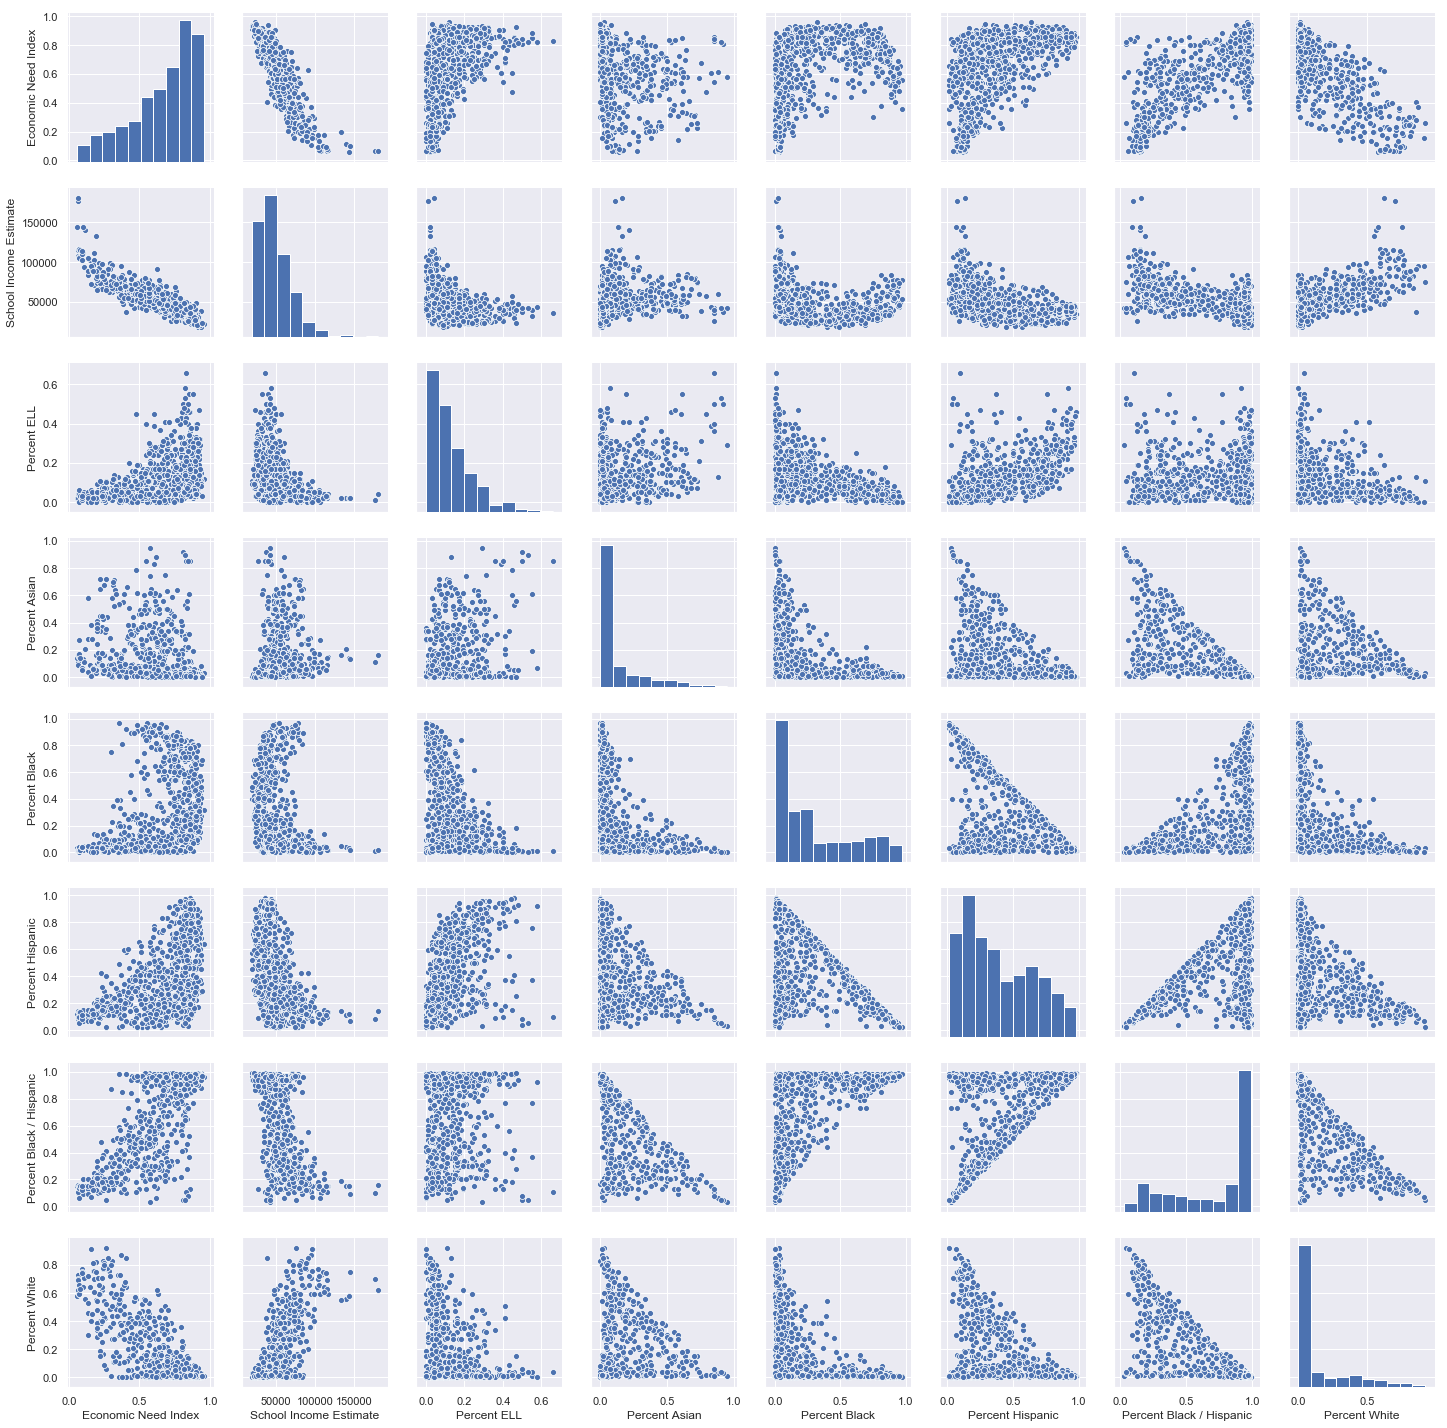

In [4]:
# Pair plot on Economic need Index against all demographic variables
g = sns.pairplot(df, vars=['Economic Need Index', 'School Income Estimate', 'Percent ELL', 'Percent Asian','Percent Black', 'Percent Hispanic', 'Percent Black / Hispanic', 'Percent White'])

In [5]:
# Create a Pearson Correlation Matrix for Demographic Variables
student_demographic = df[['Economic Need Index', 'School Income Estimate', 'Percent ELL', 'Percent Asian','Percent Black', 'Percent Hispanic', 'Percent Black / Hispanic', 'Percent White']]
student_demographic.corr()

,Economic Need Index,School Income Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White
Economic Need Index,1.000000,-0.891388,0.408446,-0.325332,0.319228,0.563402,0.780150,-0.779731
School Income Estimate,-0.891388,1.000000,-0.347597,0.246096,-0.278477,-0.495459,-0.683467,0.707366
Percent ELL,0.408446,-0.347597,1.000000,0.282074,-0.443366,0.533479,0.028240,-0.241516
Percent Asian,-0.325332,0.246096,0.282074,1.000000,-0.455925,-0.302894,-0.689907,0.112635
Percent Black,0.319228,-0.278477,-0.443366,-0.455925,1.000000,-0.385474,0.625496,-0.492595
Percent Hispanic,0.563402,-0.495459,0.533479,-0.302894,-0.385474,1.000000,0.478654,-0.382532
Percent Black / Hispanic,0.780150,-0.683467,0.028240,-0.689907,0.625496,0.478654,1.000000,-0.792325
Percent White,-0.779731,0.707366,-0.241516,0.112635,-0.492595,-0.382532,-0.792325,1.000000


In [6]:
# Correlations of Economic Need Index(ENI) and School Income Estimate(SIE) vs all other demographics

# Positive relationship between black/ hispanics and ENI
    # Particularly Schools wirht Hispanic students
    # Although school with more black students show a positive trend as well

In [7]:
# Testing the statistical signifance of school having higher Economic Need if they have
# higher black/hispanic percentage
ENI_black_hispanic = df[['Economic Need Index', 'Percent Black / Hispanic']]
ENI_black_hispanic_high = ENI_black_hispanic[ENI_black_hispanic['Percent Black / Hispanic'] > 0.5]
ENI_black_hispanic_high = ENI_black_hispanic_high['Economic Need Index']
ENI_black_hispanic_low = ENI_black_hispanic[ENI_black_hispanic['Percent Black / Hispanic'] <= 0.5]
ENI_black_hispanic_low = ENI_black_hispanic_low['Economic Need Index']
print(stats.ttest_ind(ENI_black_hispanic_high, ENI_black_hispanic_low))
print('p-value = ' + str((7.173365090071505e-122)/2))


Ttest_indResult(statistic=28.223631130030196, pvalue=7.173365090071505e-122)
p-value = 3.5866825450357526e-122


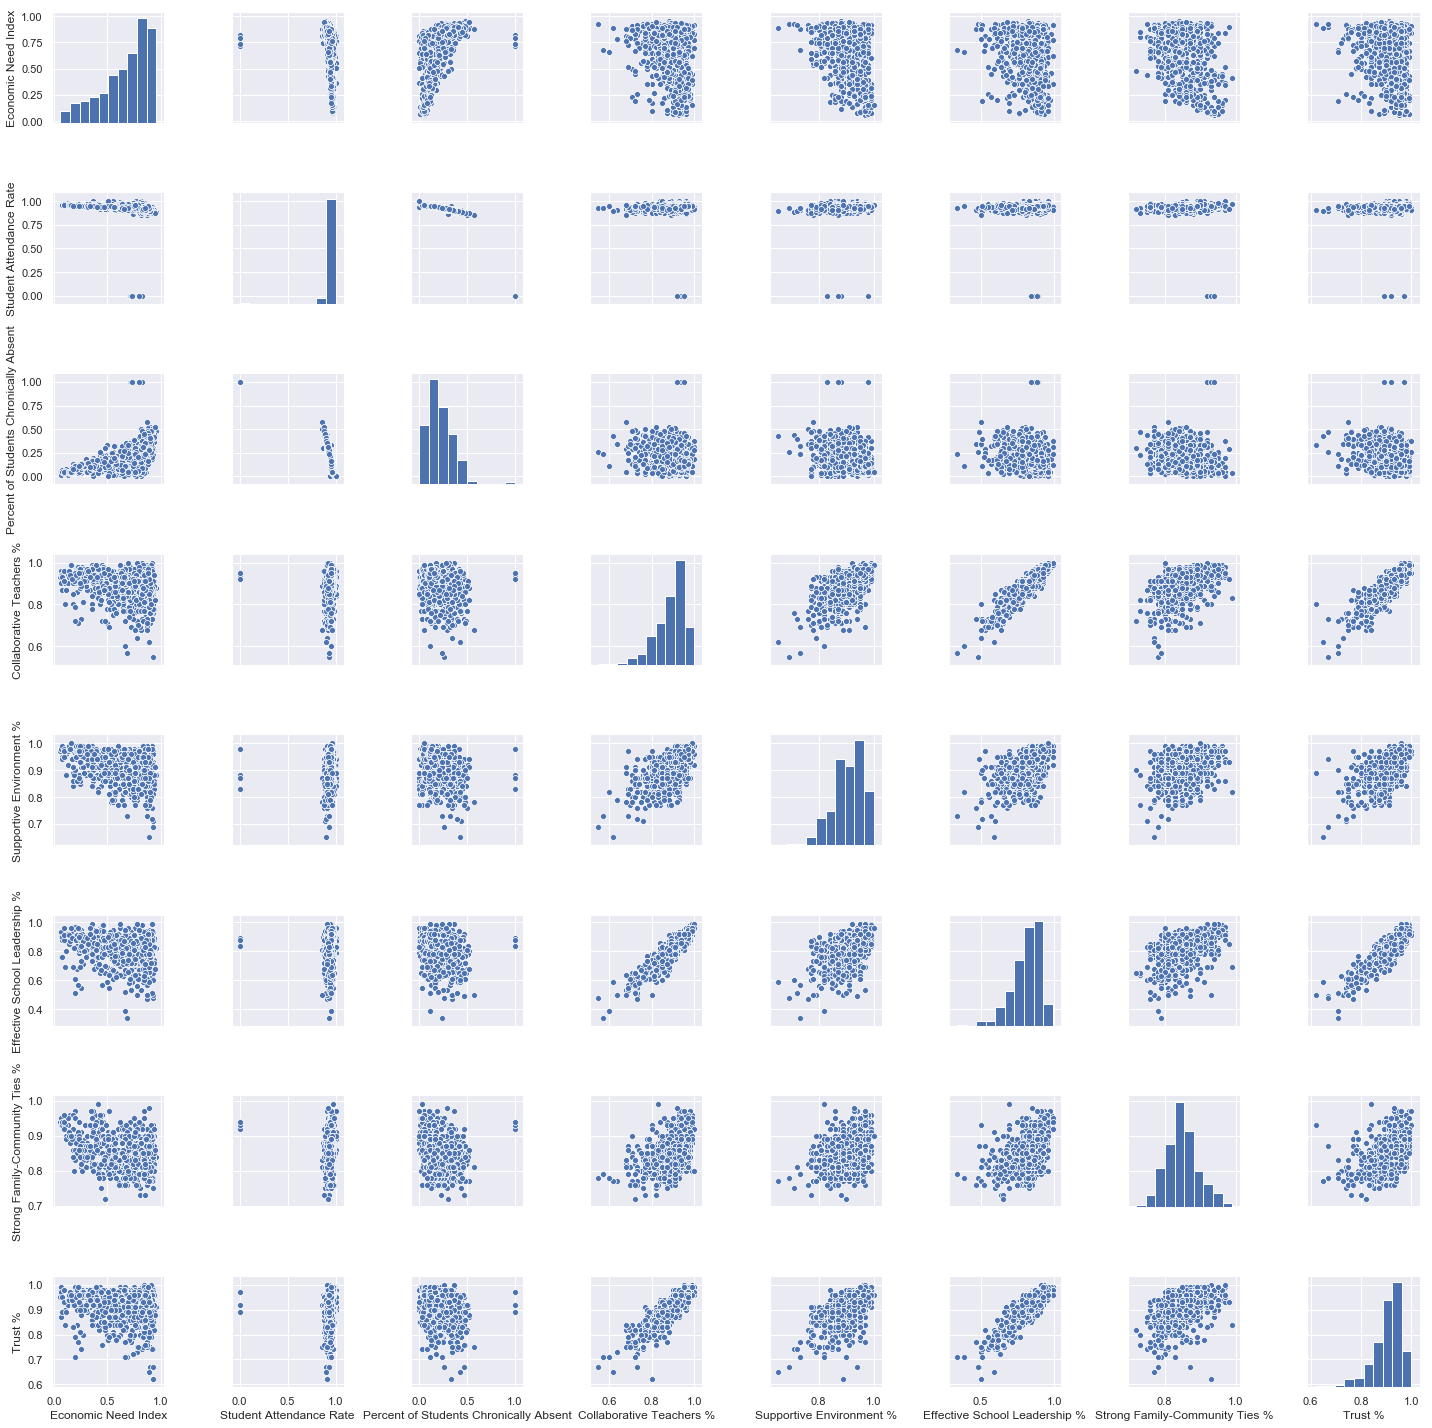

In [8]:
# Pairplot on ENI against School performance variables
g = sns.pairplot(df, vars=['Economic Need Index', 'Student Attendance Rate', 'Percent of Students Chronically Absent', 'Collaborative Teachers %', 'Supportive Environment %', 'Effective School Leadership %', 'Strong Family-Community Ties %', 'Trust %'])

In [9]:
# Pearson correlation matrix of ENI vs. School performance
school_rating = df[['Economic Need Index', 'Student Attendance Rate', 'Percent of Students Chronically Absent', 'Rigorous Instruction %', 'Collaborative Teachers %', 'Supportive Environment %', 'Effective School Leadership %', 'Strong Family-Community Ties %', 'Trust %']]
school_rating.corr()

,Economic Need Index,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %
Economic Need Index,1.000000,-0.217135,0.618113,-0.259403,-0.235427,-0.358539,-0.229820,-0.326378,-0.185525
Student Attendance Rate,-0.217135,1.000000,-0.699301,-0.026649,0.007920,0.087344,0.031323,-0.080103,0.033163
Percent of Students Chronically Absent,0.618113,-0.699301,1.000000,-0.117590,-0.174420,-0.277986,-0.212225,-0.125811,-0.194406
Rigorous Instruction %,-0.259403,-0.026649,-0.117590,1.000000,0.698796,0.615019,0.597544,0.272882,0.534260
Collaborative Teachers %,-0.235427,0.007920,-0.174420,0.698796,1.000000,0.605833,0.908748,0.411484,0.875062
Supportive Environment %,-0.358539,0.087344,-0.277986,0.615019,0.605833,1.000000,0.513870,0.304628,0.584578
Effective School Leadership %,-0.229820,0.031323,-0.212225,0.597544,0.908748,0.513870,1.000000,0.445064,0.878539
Strong Family-Community Ties %,-0.326378,-0.080103,-0.125811,0.272882,0.411484,0.304628,0.445064,1.000000,0.414294
Trust %,-0.185525,0.033163,-0.194406,0.534260,0.875062,0.584578,0.878539,0.414294,1.000000


In [10]:
# Testing statistical significance of ENI based on how chronically absent students are
ENI_absent = df[['Economic Need Index', 'Percent of Students Chronically Absent']]
ENI_absent_high = ENI_absent[ENI_absent['Percent of Students Chronically Absent'] > 0.5]
ENI_absent_high = ENI_absent_high['Percent of Students Chronically Absent']
ENI_absent_low = ENI_absent[ENI_absent['Percent of Students Chronically Absent'] <= 0.5]
ENI_absent_low = ENI_absent_low['Percent of Students Chronically Absent']
print(stats.ttest_ind(ENI_absent_high, ENI_absent_low))

# Of schools with high absence rates, which variables are signifcantly higher

Ttest_indResult(statistic=14.44693126803112, pvalue=3.611322220567233e-42)


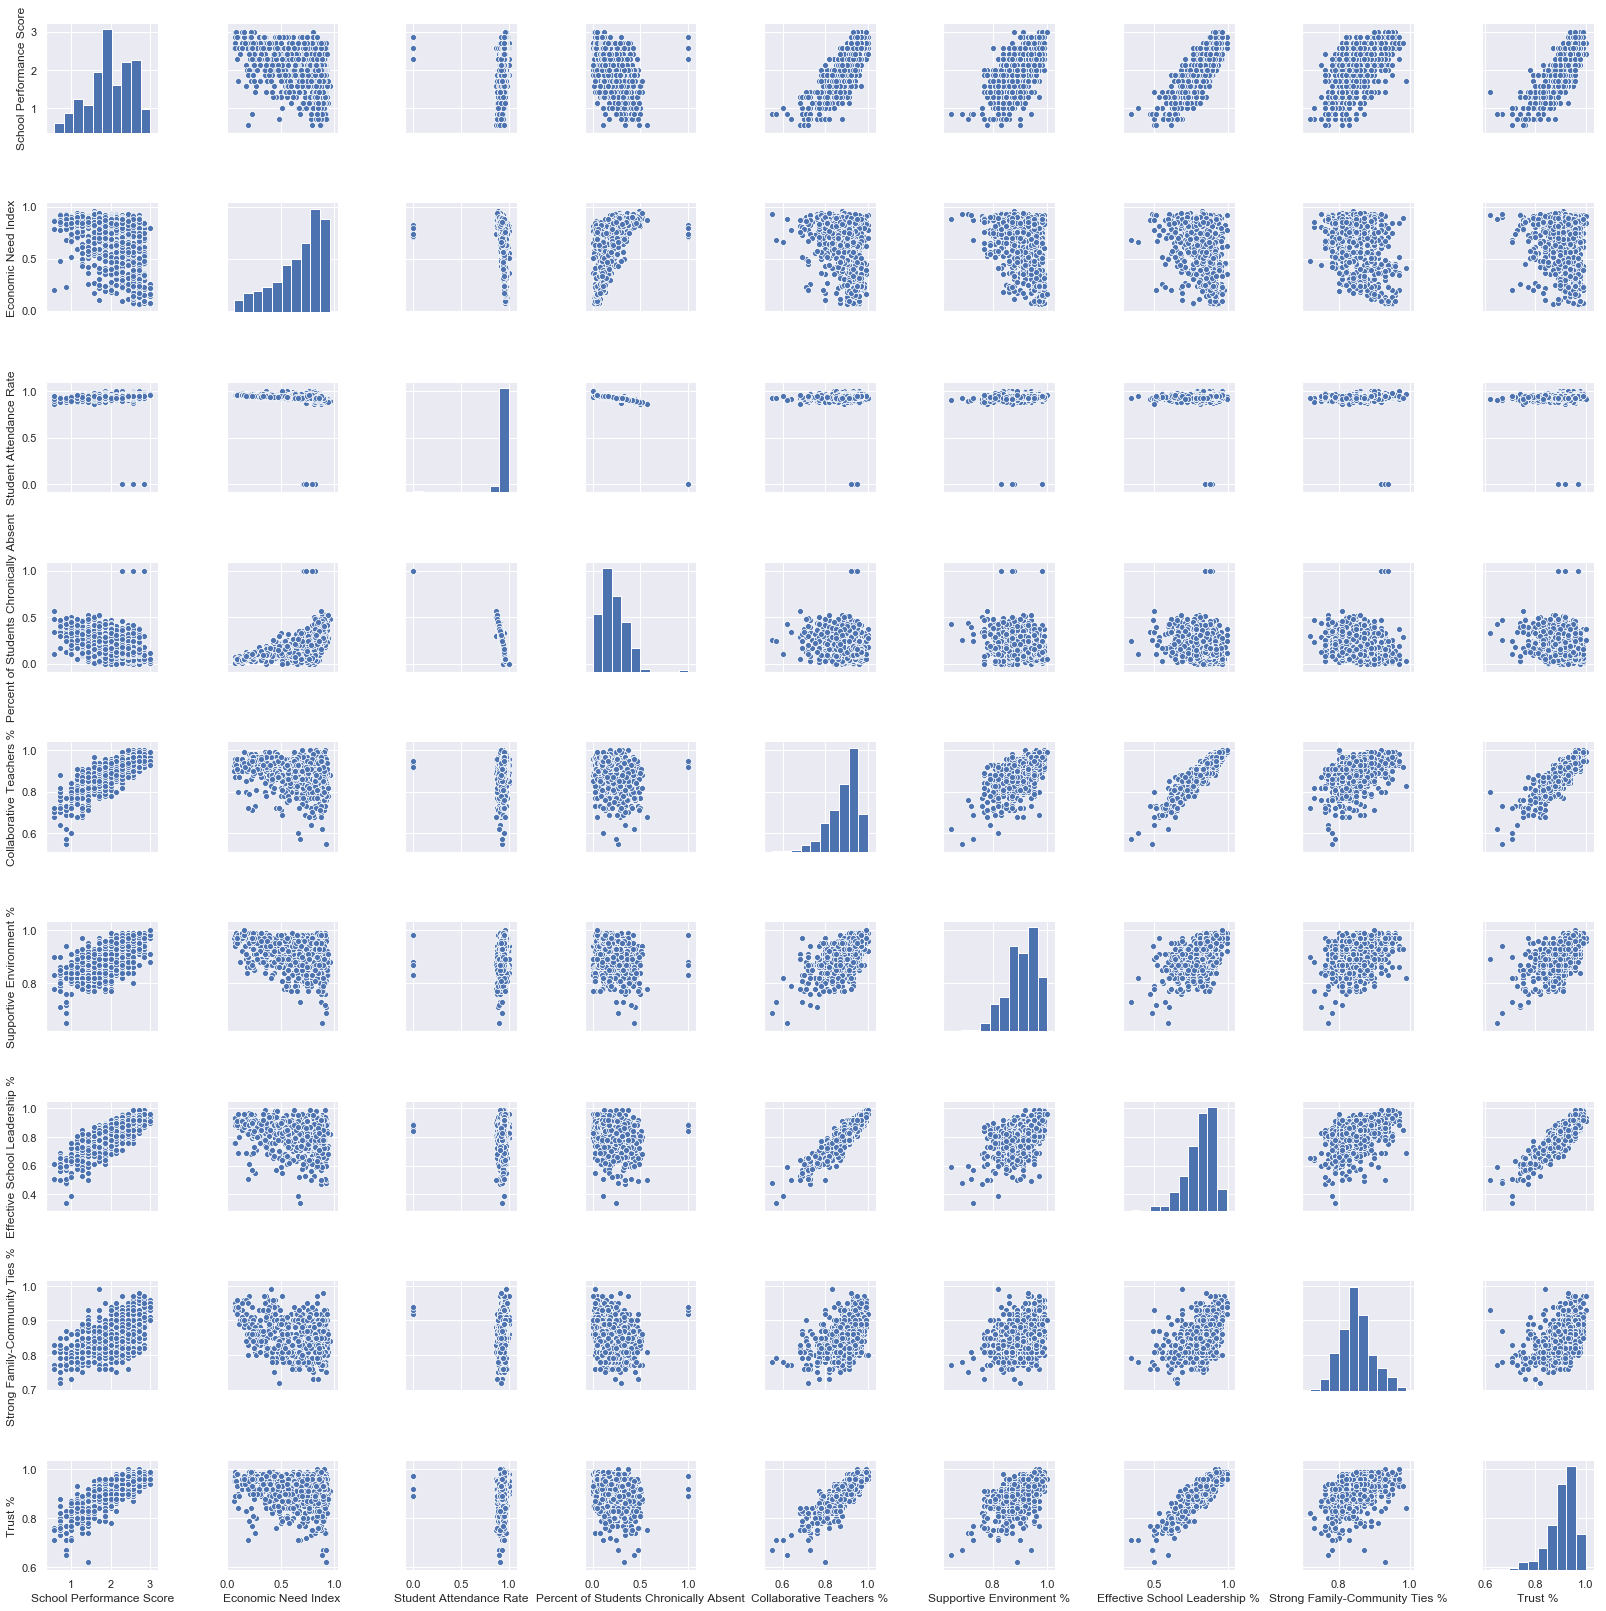

In [11]:
# Creating a new column that averages the rating of each school based on a ranking
# from 0 to 3.
df['School Performance Score'] = ((df['Rigorous Instruction Rating'] + df['Collaborative Teachers Rating'] + df['Supportive Environment Rating'] + df['Effective School Leadership Rating'] + df['Strong Family-Community Ties Rating'] + df['Trust Rating'] + df['Student Achievement Rating'])/7)

# Pairplot of School Performance Score against ENI and other variables
sns.pairplot(df, vars=['School Performance Score', 'Economic Need Index', 'Student Attendance Rate', 'Percent of Students Chronically Absent', 'Collaborative Teachers %', 'Supportive Environment %', 'Effective School Leadership %', 'Strong Family-Community Ties %', 'Trust %'])

In [12]:
# Pearson Correlation Matrix of School performance score vs ENI and other variables
school_performance = df[['School Performance Score', 'Economic Need Index', 'Student Attendance Rate', 'Percent of Students Chronically Absent', 'Collaborative Teachers %', 'Supportive Environment %', 'Effective School Leadership %', 'Strong Family-Community Ties %', 'Trust %']]    
school_performance.corr()                 
                         

,School Performance Score,Economic Need Index,Student Attendance Rate,Percent of Students Chronically Absent,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %
School Performance Score,1.000000,-0.427062,0.070240,-0.411001,0.803154,0.652771,0.813794,0.543304,0.792180
Economic Need Index,-0.427062,1.000000,-0.217135,0.618113,-0.235427,-0.358539,-0.229820,-0.326378,-0.185525
Student Attendance Rate,0.070240,-0.217135,1.000000,-0.699301,0.007920,0.087344,0.031323,-0.080103,0.033163
Percent of Students Chronically Absent,-0.411001,0.618113,-0.699301,1.000000,-0.174420,-0.277986,-0.212225,-0.125811,-0.194406
Collaborative Teachers %,0.803154,-0.235427,0.007920,-0.174420,1.000000,0.605833,0.908748,0.411484,0.875062
Supportive Environment %,0.652771,-0.358539,0.087344,-0.277986,0.605833,1.000000,0.513870,0.304628,0.584578
Effective School Leadership %,0.813794,-0.229820,0.031323,-0.212225,0.908748,0.513870,1.000000,0.445064,0.878539
Strong Family-Community Ties %,0.543304,-0.326378,-0.080103,-0.125811,0.411484,0.304628,0.445064,1.000000,0.414294
Trust %,0.792180,-0.185525,0.033163,-0.194406,0.875062,0.584578,0.878539,0.414294,1.000000


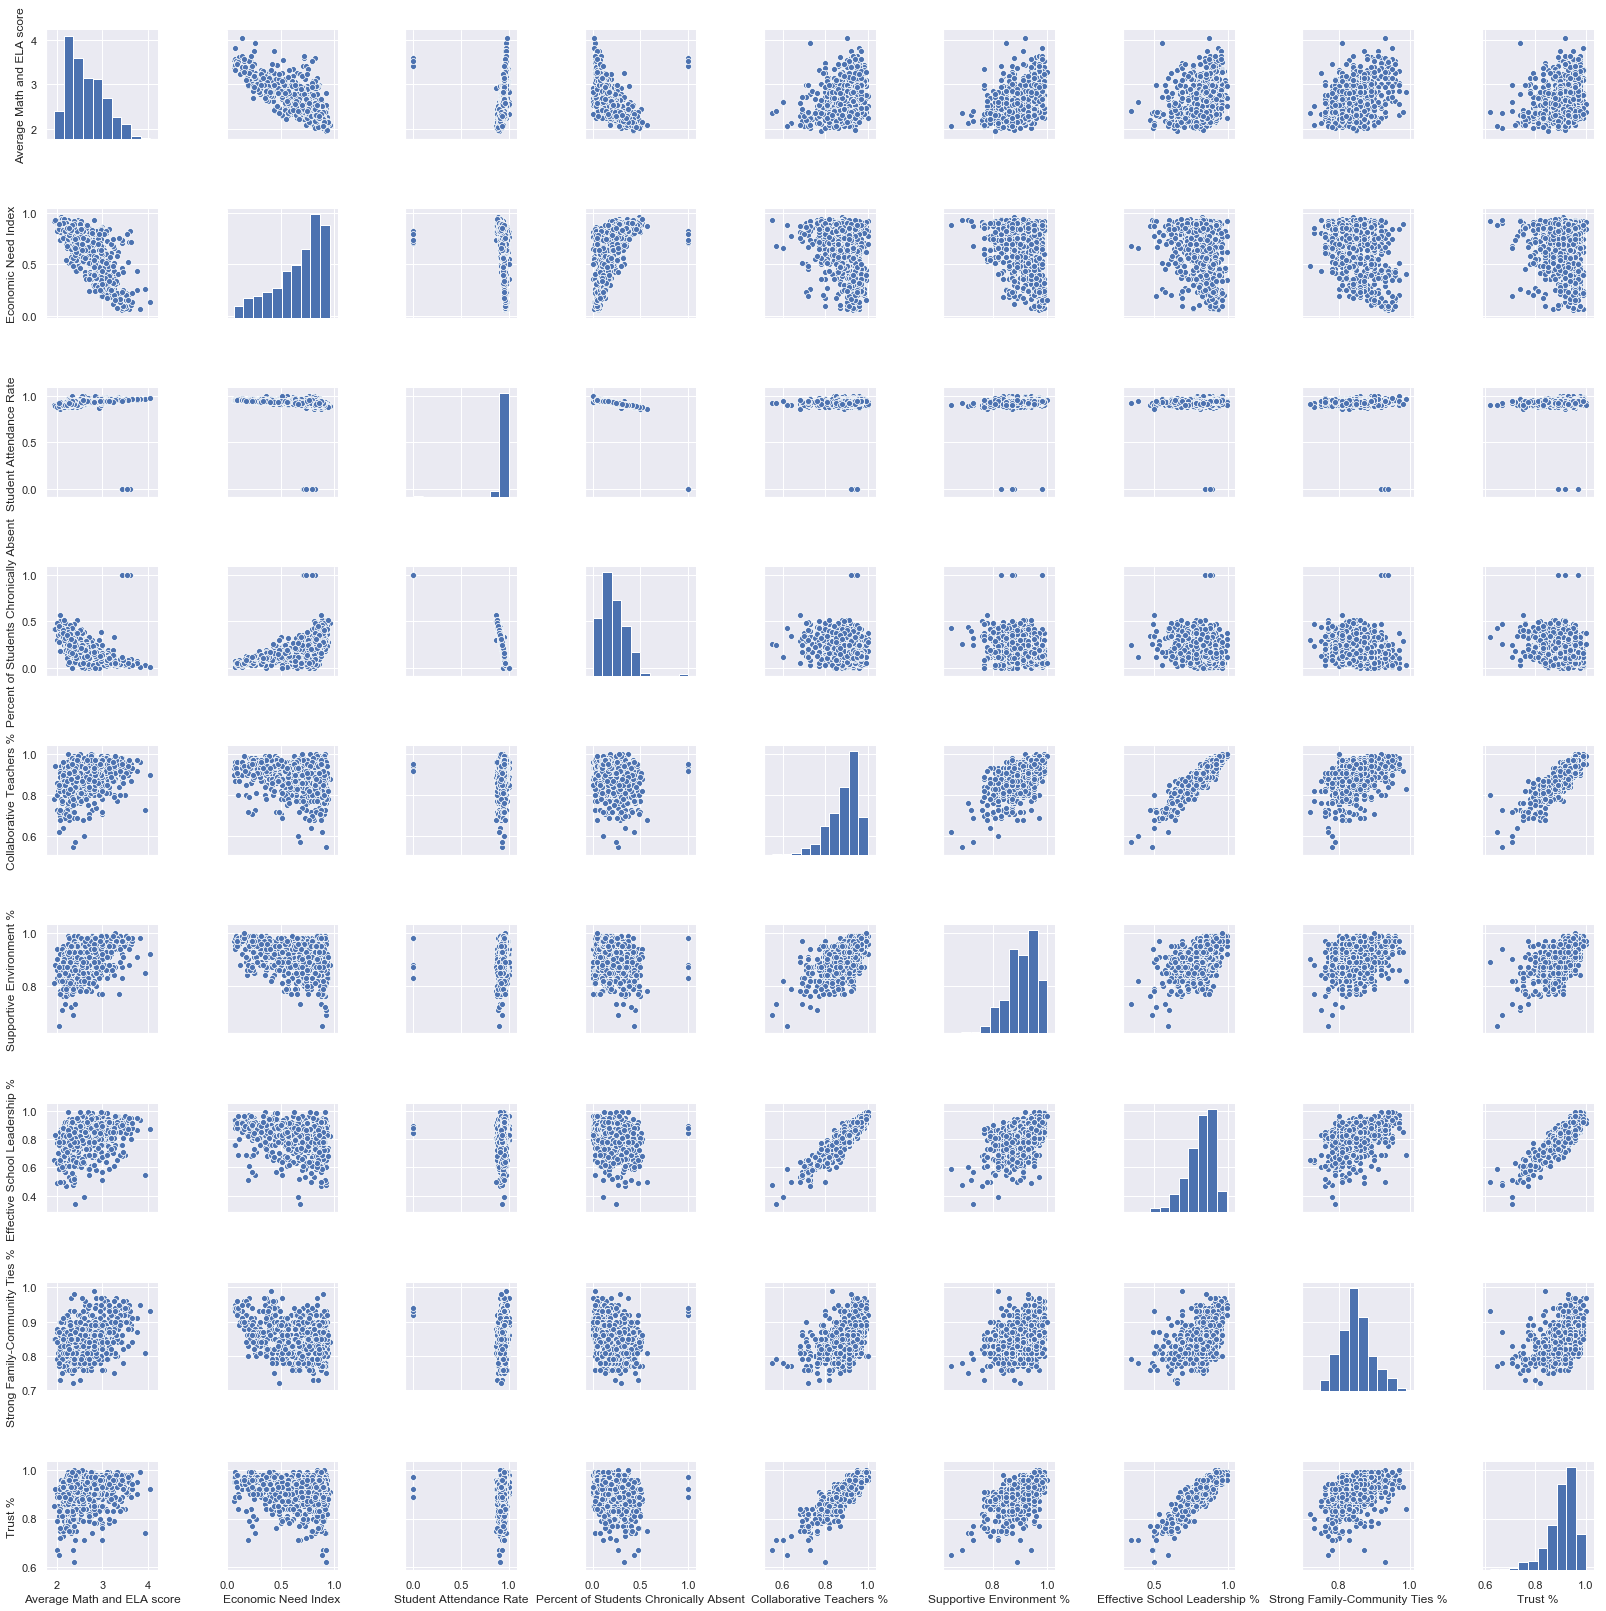

In [13]:
# Pairplot of average math and ELA scores against ENI and other variables
df['Average Math and ELA score'] = ((df['Average ELA Proficiency'] + df['Average Math Proficiency'])/2)

sns.pairplot(df, vars=['Average Math and ELA score', 'Economic Need Index', 'Student Attendance Rate', 'Percent of Students Chronically Absent', 'Collaborative Teachers %', 'Supportive Environment %', 'Effective School Leadership %', 'Strong Family-Community Ties %', 'Trust %'])

In [14]:
# Pearson Correlation matrix of Math and ELA scores against ENI and other variables
math_ela = df[['Average Math and ELA score', 'Economic Need Index', 'Student Attendance Rate', 'Percent of Students Chronically Absent', 'Collaborative Teachers %', 'Supportive Environment %', 'Effective School Leadership %', 'Strong Family-Community Ties %', 'Trust %']]
math_ela.corr()

,Average Math and ELA score,Economic Need Index,Student Attendance Rate,Percent of Students Chronically Absent,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %
Average Math and ELA score,1.000000,-0.791884,0.045455,-0.581522,0.329619,0.448046,0.329304,0.305245,0.280359
Economic Need Index,-0.791884,1.000000,-0.217135,0.618113,-0.235427,-0.358539,-0.229820,-0.326378,-0.185525
Student Attendance Rate,0.045455,-0.217135,1.000000,-0.699301,0.007920,0.087344,0.031323,-0.080103,0.033163
Percent of Students Chronically Absent,-0.581522,0.618113,-0.699301,1.000000,-0.174420,-0.277986,-0.212225,-0.125811,-0.194406
Collaborative Teachers %,0.329619,-0.235427,0.007920,-0.174420,1.000000,0.605833,0.908748,0.411484,0.875062
Supportive Environment %,0.448046,-0.358539,0.087344,-0.277986,0.605833,1.000000,0.513870,0.304628,0.584578
Effective School Leadership %,0.329304,-0.229820,0.031323,-0.212225,0.908748,0.513870,1.000000,0.445064,0.878539
Strong Family-Community Ties %,0.305245,-0.326378,-0.080103,-0.125811,0.411484,0.304628,0.445064,1.000000,0.414294
Trust %,0.280359,-0.185525,0.033163,-0.194406,0.875062,0.584578,0.878539,0.414294,1.000000


In [15]:
# Testing statistical significance of Average math and ela scores with ENI
score = df[['Economic Need Index', 'Average Math and ELA score']]
high_score = score[score['Economic Need Index']> 0.5]
high_score = high_score['Average Math and ELA score']
low_score = score[score['Economic Need Index']<= 0.5]
low_score = low_score['Average Math and ELA score']
print(stats.ttest_ind(high_score, low_score))

Ttest_indResult(statistic=-23.782466230187108, pvalue=8.550010803183755e-95)


In [16]:
# Testing statistical significance of Average math and ela scores with supportive environment
support = df[['Supportive Environment %', 'Average Math and ELA score']]
high_support = support[support['Supportive Environment %']> 0.91]
high_support = high_support['Average Math and ELA score']
low_support = support[support['Supportive Environment %']<= 0.91]
low_support = low_support['Average Math and ELA score']
print(stats.ttest_ind(high_support, low_support))

Ttest_indResult(statistic=12.42796199336386, pvalue=1.5840179417072458e-32)


### Create an OLS regression on this Data to predict Economic Need Index

1. Watch or read a tutorial on multivariable linear regression
2. Apply methods to Data
3. Check significance of parameters (T values)
4. Cross validate
5. Tune Parameters to improve model

### Create a KNN regression on this Data to predict Economic Need Index

1. Watch or read a tutorial on KNN regression
2. Apply methods to Data
3. Cross validate
4. Tune parameters to improve parameters

### Compare Models

1. Which model is more accurate?

In [17]:
from sklearn import linear_model

# Percent of students chronically absent, Percent of students black/hispanic, Percent ELL

X = df[['Percent of Students Chronically Absent', 'Percent Black / Hispanic', 'Percent ELL']]
Y = df['Economic Need Index']

In [18]:
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [19]:
predictions = lm.predict(X)
print(predictions[0:5])

[0.71412872 0.66574844 0.67611785 0.25143409 0.49536203]


In [20]:
lm.score(X,Y)

0.8078652132405212

In [21]:
lm.coef_

array([0.45427427, 0.44568043, 0.81848417])

In [22]:
lm.intercept_

0.1486697794888474